<a href="https://colab.research.google.com/github/gauriiii13/Data-Analysis-Projects/blob/main/amazon_datascience_book_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMAZON DATA SCIENCE BOOKS ANALYSIS

While learning this course I developed an interest in data science which lead me to making a project that analyses the data science books available on Amazon. I downloaded the dataset from Kaggle and worked upon it.


This project covers the following topics:

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, soring, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

To start working on our project, we have to first download our dataset from kaggle. I chose the dataset containing information about amazon data science books. We download it using opendatasets library of python.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./amazon-data-science-books" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './amazon-data-science-books'

In [ ]:
import os
os.listdir(data_dir)

['final_book_dataset_kaggle2.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "amazon-data-science-books-dataset-analysis"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

Now that we have downloaded the dataset, it is time to prepare and clean the data using pandas so that it becomes ready to use and we can gain useful insights from the data



In [ ]:
book_df=pd.read_csv('/content/amazon-data-science-books/final_book_dataset_kaggle2.csv')

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Most of the columns have type object because they most likely contain null values. The total number of rows is 830 while almost none of the rows have non-null values as 830. So we can see that a lot of cleaaning is to be done on the data

In [ ]:
book_df

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


Only 2 of the columns, that are, price and avg_reviews are numeric, even though some of the other columns should also be numeric. So, firstly let's fix the data type of these columns.

In [ ]:
book_df['price (including used books)']=pd.to_numeric(book_df['price (including used books)'], errors='coerce')
book_df['pages']=pd.to_numeric(book_df['pages'], errors='coerce')
book_df['n_reviews']=pd.to_numeric(book_df['n_reviews'], errors='coerce')

Now we can see that the data type of our selected columns has been converted into float64

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  461 non-null    float64
 4   pages                         736 non-null    float64
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     655 non-null    float64
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [ ]:
book_df.describe()

,price,price (including used books),pages,avg_reviews,n_reviews
count,722.000000,461.000000,736.000000,702.000000,655.000000
mean,46.491537,40.668677,391.078804,4.472080,108.175573
std,63.292394,73.153068,237.871838,0.409608,163.704762
min,0.990000,0.990000,6.000000,1.000000,1.000000
25%,23.725000,19.310000,240.000000,4.325000,12.000000
50%,39.490000,33.610000,360.000000,4.500000,40.000000
75%,51.990000,46.990000,493.750000,4.700000,126.000000
max,1318.740000,1318.740000,2962.000000,5.000000,989.000000


There is a problem with price and price(including used books) columns as the price of a book cannot be 0.99... Also the min number of pages is 6 which is also a bit illogical. It is better to drop such rows.

In [ ]:
book_df.drop(book_df[book_df['price']<10].index,inplace=True)
book_df.drop(book_df[book_df['price (including used books)']<10].index,inplace=True)
book_df.drop(book_df[book_df['pages']<50].index,inplace=True)

We can see that the minimum price is now changed to approx 10 and minimum number of pages are turned into 56

In [ ]:
book_df.describe()

,price,price (including used books),pages,avg_reviews,n_reviews
count,671.000000,415.000000,690.000000,658.000000,621.000000
mean,49.487347,44.374361,406.079710,4.468237,109.109501
std,64.674197,76.201886,234.905449,0.415246,164.941175
min,10.040000,10.040000,56.000000,1.000000,1.000000
25%,25.990000,23.100000,256.000000,4.300000,12.000000
50%,39.990000,36.990000,368.000000,4.500000,41.000000
75%,54.040000,47.690000,504.000000,4.700000,127.000000
max,1318.740000,1318.740000,2962.000000,5.000000,989.000000


Now let us deal with the null values. We can first calculate the percentage of null values in each column.

In [ ]:
null_vals_percent= book_df.isna().sum()*100/book_df.shape[0]
null_vals_percent

title                            0.000000
author                          20.360825
price                           13.530928
price (including used books)    46.520619
pages                           11.082474
avg_reviews                     15.206186
n_reviews                       19.974227
star5                           15.206186
star4                           22.938144
star3                           33.376289
star2                           45.876289
star1                           60.953608
dimensions                      21.907216
weight                          20.489691
language                         8.891753
publisher                       13.402062
ISBN_13                         18.556701
link                             0.000000
complete_link                    0.000000
dtype: float64

We can drop some of the columns that provide no useful insights and have significantly higher number of NaN values.

In [ ]:
book_df2=book_df.copy()
book_df2.drop(['star1','star2','star3','star4','dimensions'],axis=1,inplace=True)

Now we can drop all the NaN values from the remaining columns

In [ ]:
book_df3=book_df2.dropna()
book_df3.shape

(262, 14)

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

Now that we have completed the data cleaning and our data is ready to be used, we can use matplotlob and seaborn libraries to perform data visualization. We can make interesting graphs for various columns of the dataframe and make necessary inferences from it.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We can see clearly the basic stats for the price of books using barplot in seaborn.

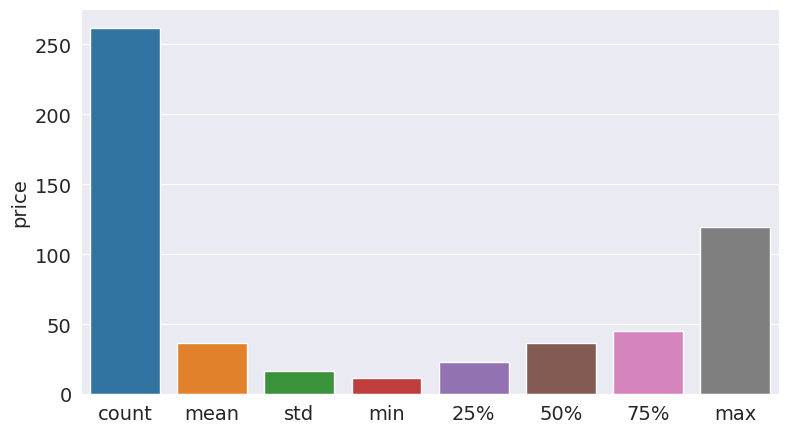

In [ ]:
sns.barplot(x=book_df3.describe()['price'].index,y=book_df3.describe()['price']);

We can see the histogram plotted for the distribution of price of books in continuous intervals.

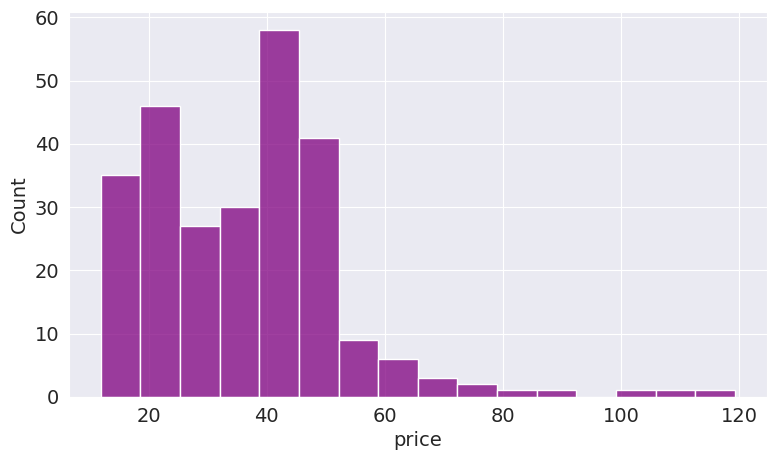

In [ ]:
sns.histplot(book_df3.price,color='purple');

We can compare the bar graphs of price column and price (including used books) column. It can be inferred that there is not much of a difference between both.

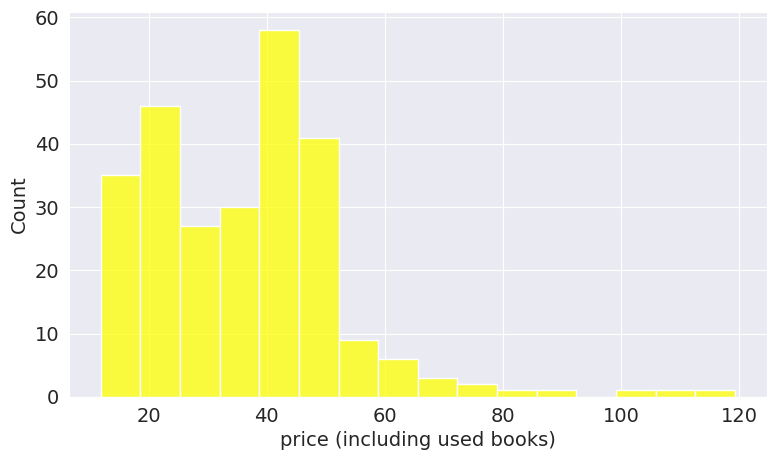

In [ ]:
sns.histplot(book_df3['price (including used books)'],color='yellow');

This is a scatterplot having pages on x-axis and price on y-axis, and avg_review as hue

<Axes: xlabel='pages', ylabel='price'>

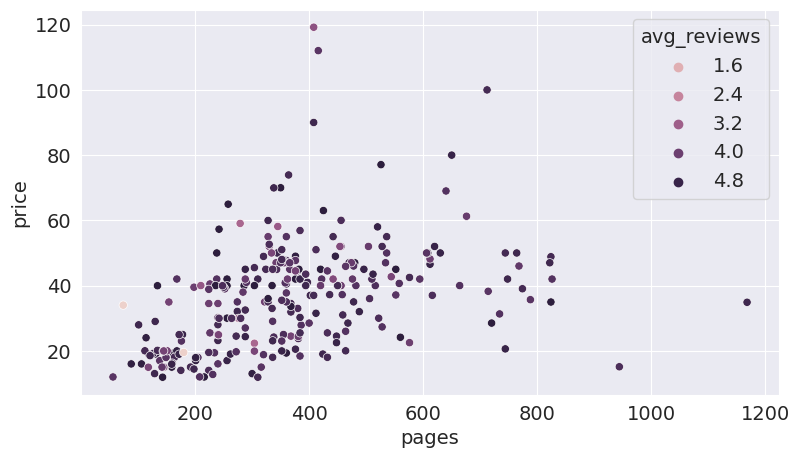

In [ ]:
sns.scatterplot(x=book_df3.pages,y=book_df3.price,hue=book_df3.avg_reviews)

This graph shows the relationship between author and n_reviews

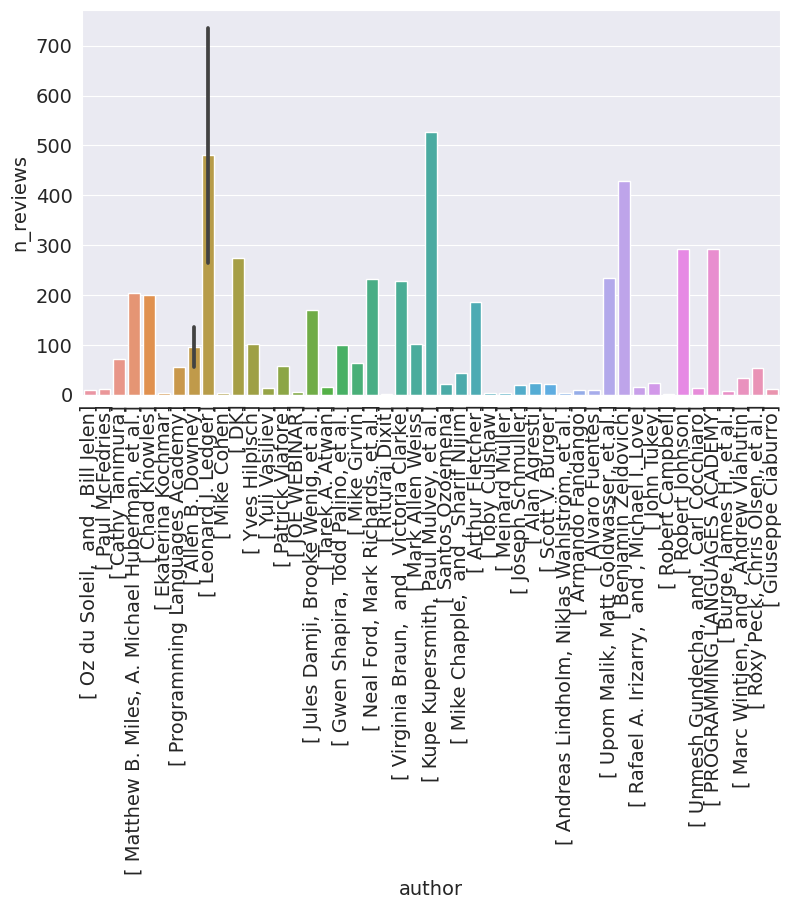

<Figure size 10000x10000 with 0 Axes>

In [ ]:
sns.barplot(x=book_df3.author.head(50),y=book_df3.n_reviews.head(50))
plt.xticks(rotation=90)
plt.figure(figsize=(100,100));

Checking distribuition is crucial once we have deleted the null values, the graph should be identical which means the data has been reduced in order that the outputs won't be affected

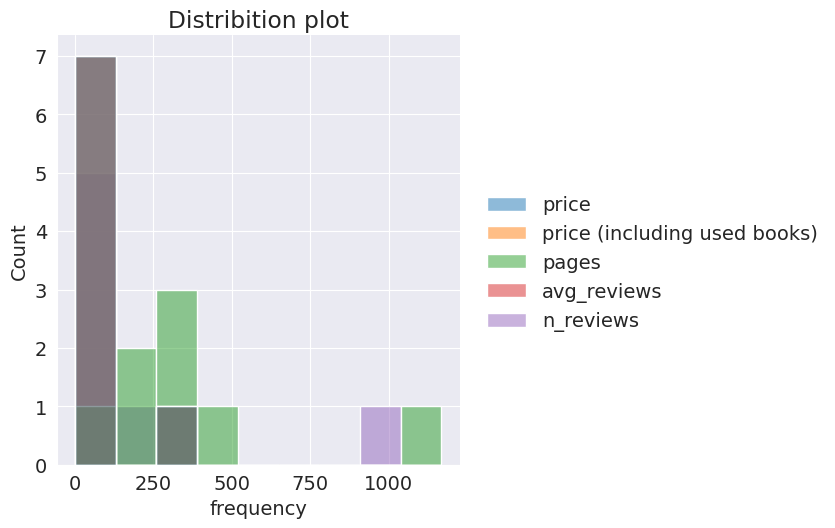

In [ ]:
sns.displot(book_df3.describe());
plt.xlabel('frequency');
plt.title('Distribution plot');

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Asking and Answering Questions

Since, we are done with the exploratory analysis of our dataset, we should ask some questions and try to answer them using our knowledge of python libraries



#### Q1: List all the books with an average rating more than 4.5

We have to run a query to create a dataframe containing books with a rating above 4.5

In [ ]:
book_rating=book_df3[book_df3.avg_reviews>4.5]

We can display the title of all the books with a rating above 4.5 using book_rating.title

In [ ]:
book_rating.title

2      Guerrilla Data Analysis Using Microsoft Excel:...
6      SQL for Data Analysis: Advanced Techniques for...
7        Qualitative Data Analysis: A Methods Sourcebook
11     SQL for Data Analytics: Perform efficient and ...
27     Python Programming For Beginners: The Ultimate...
                             ...                        
795              Introduction to Biomedical Data Science
798    Algorithms For Dummies (For Dummies (Computer/...
819    Decolonizing Data: Unsettling Conversations ab...
821    Machine Learning with PyTorch and Scikit-Learn...
827    Practical Deep Learning at Scale with MLflow: ...
Name: title, Length: 130, dtype: object

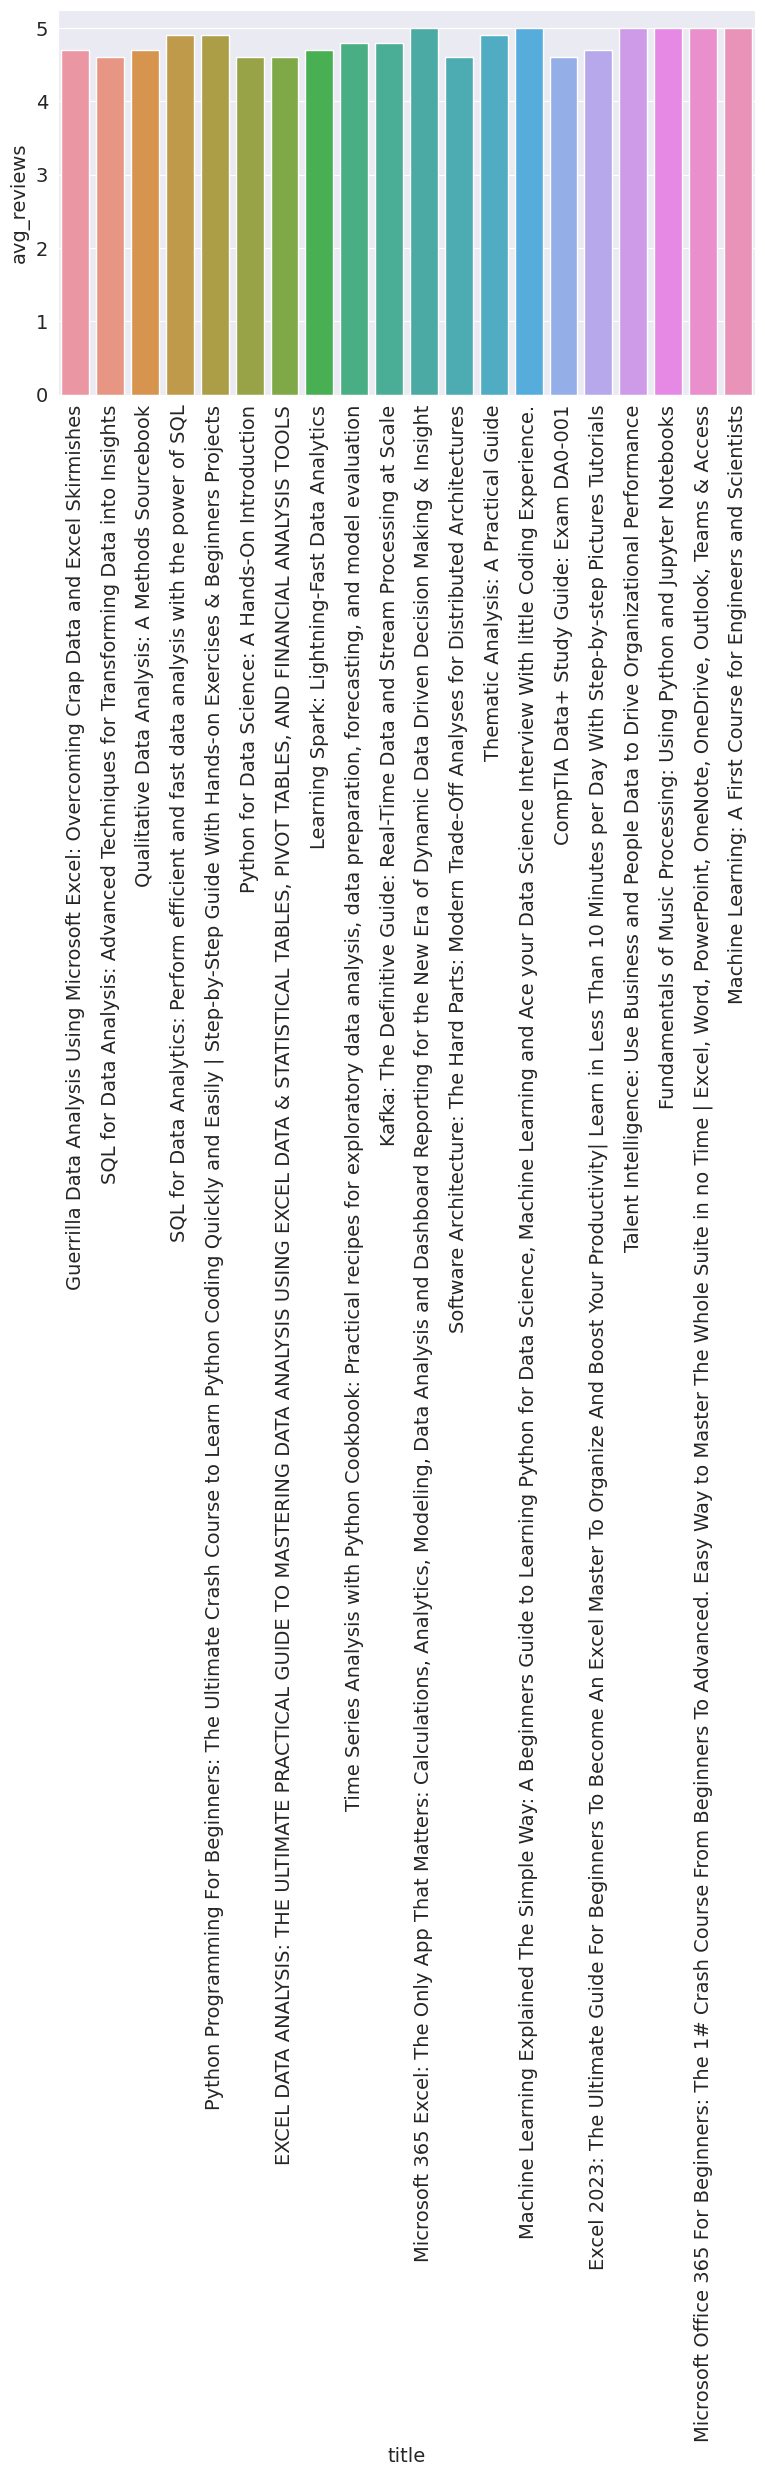

In [ ]:
sns.barplot(x=book_rating.title.head(20),y=book_rating.avg_reviews.head(20))
plt.xticks(rotation=90);

**Explanation**

We can plot the first 20 books using sns.barplot() having book titles on x-axis and avg_reviews on y-axis. We can see that all the reviews are between 4.5 and 5. Using plt.xticks function, we can change the orientation of book titles on the x-axis

**Conclusion**

  By using shape attribute, we print the tuple containing the dimensions of the dataframe. The number of rows is 130, hence the number of books having a rating above 4.5 is 130. As compared to the total number of books in our cleaned data frame which is 262, it is almost half.

In [ ]:
book_rating.shape

(130, 14)

#### Q2: Are the prices proportional to the number of pages?

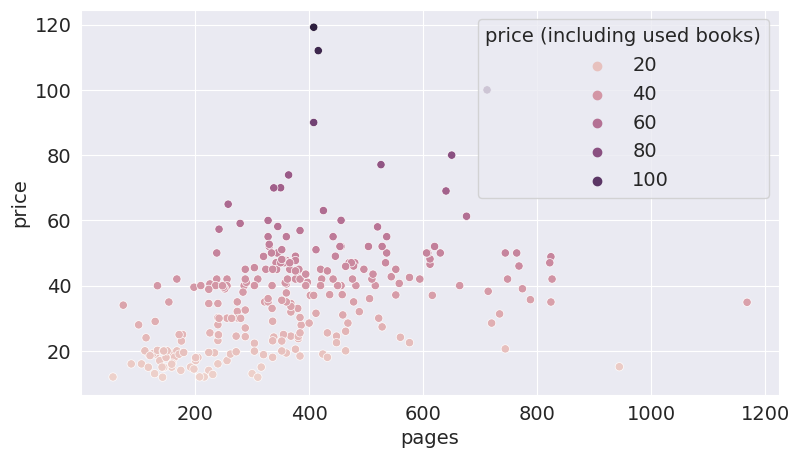

In [ ]:
sns.scatterplot(x=book_df3.pages,y=book_df3.price, hue=book_df3['price (including used books)']);

**Explanation**

Using scatterplot, we can compare the correlation between the number of pages in a book and its price. The hue can be set as price (including used books) because there is not much of a difference between price and price (including used books).

**Conclusion**

We can infer that maximum cost is of a book with approximately 400 pages. On the other hand, a book with almost 1200 pages is very inexpensive. This means that it is not necessary that a book with higher number of pages is costlier.

#### Q3: Find out the costliest book in the entire data frame and list its title, author and publisher.

Let us first create a dataframe consisting of only price, author, title and publisher columns.

In [ ]:
costliest_book= book_df3[['price','author','title','publisher']]
costliest_book

,price,author,title,publisher
2,32.07,"[ Oz du Soleil, and , Bill Jelen]",Guerrilla Data Analysis Using Microsoft Excel:...,"Holy Macro! Books; Third edition (August 1, 2022)"
4,24.49,[ Paul McFedries],Excel Data Analysis For Dummies (For Dummies (...,"For Dummies; 5th edition (February 3, 2022)"
6,40.49,[ Cathy Tanimura],SQL for Data Analysis: Advanced Techniques for...,"O'Reilly Media; 1st edition (October 5, 2021)"
7,90.00,"[ Matthew B. Miles, A. Michael Huberman, et al.]",Qualitative Data Analysis: A Methods Sourcebook,"SAGE Publications, Inc; 4th edition (January 2..."
11,15.97,[ Chad Knowles],SQL for Data Analytics: Perform efficient and ...,"Independently published (September 21, 2022)"
...,...,...,...,...
802,19.69,"[ Paul Leonardi, and , Tsedal Neeley]",The Digital Mindset: What It Really Takes to T...,"Harvard Business Review Press (May 10, 2022)"
810,41.99,[ Hendrik Kleine],Tableau Prep Cookbook: Use Tableau Prep to cle...,"Packt Publishing (March 19, 2021)"
819,24.95,[ Jacqueline M. Quinless],Decolonizing Data: Unsettling Conversations ab...,"University of Toronto Press (February 15, 2022)"
821,39.02,"[ Sebastian Raschka, Yuxi (Hayden) Liu, et al.]",Machine Learning with PyTorch and Scikit-Learn...,"Packt Publishing (February 25, 2022)"


In [ ]:
highest_price = book_df3.nlargest(10, 'price')

Now we can find out the maximum price of a book using max() function on the price column.

In [ ]:
max_price=costliest_book.price.max()
max_price

119.21

Let us print the author with maximum book price

In [ ]:
costliest_book[costliest_book.price==119.21].author

658    [ Christopher Hian-ann Ting]
Name: author, dtype: object

Let us print the book title with maximum book price

In [ ]:
costliest_book[costliest_book.price==119.21].title

658    Algorithmic Finance: A Companion To Data Science
Name: title, dtype: object

Let us print the publisher with maximum book price

In [ ]:
costliest_book[costliest_book.price==119.21].publisher

658    WSPC (May 6, 2022)
Name: publisher, dtype: object

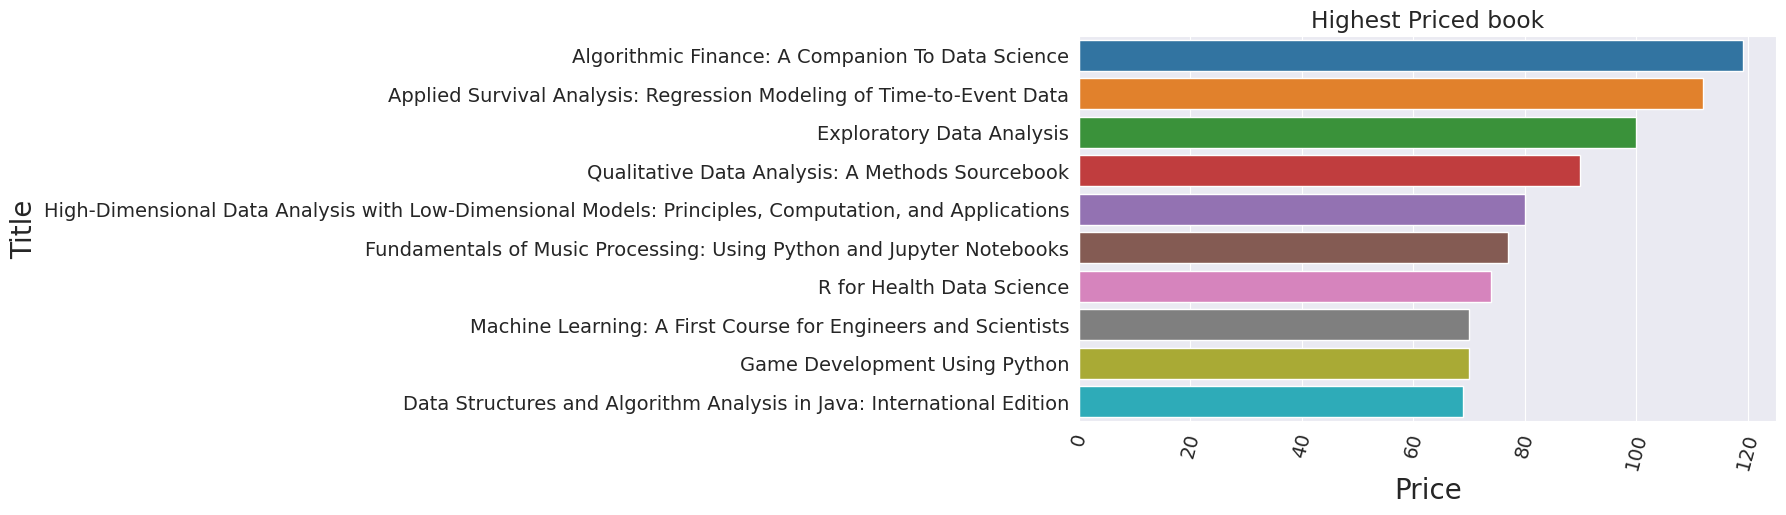

In [ ]:
sns.barplot(y = highest_price['title'], x = highest_price['price'])
plt.xticks(rotation = 75);
plt.title("Highest Priced book");
plt.ylabel("Title", fontsize=20);
plt.xlabel("Price", fontsize=20);

**Explanation**

With the help of bar graph, we can clearly see that the costliest book is Algorithmic Finance: A Companion To Data Science

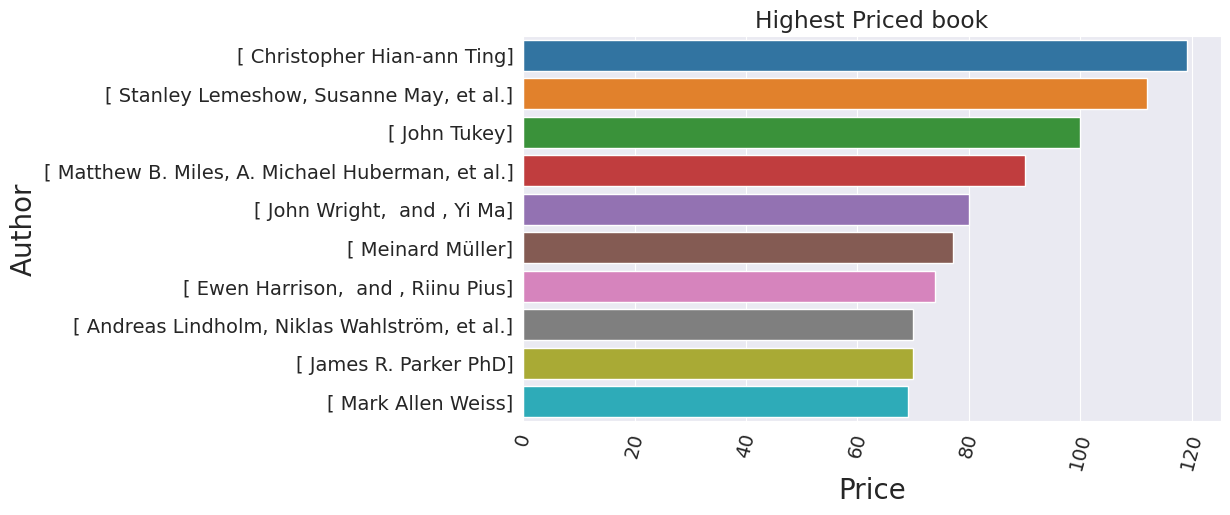

In [ ]:
sns.barplot(y = highest_price['author'], x = highest_price['price'])
plt.xticks(rotation = 75);
plt.title("Highest Priced book");
plt.ylabel("Author", fontsize=20);
plt.xlabel("Price", fontsize=20);

**Explanation**

With the help of bar graph, we can clearly see that the author with costliest book is Christopher Hian-ann Ting

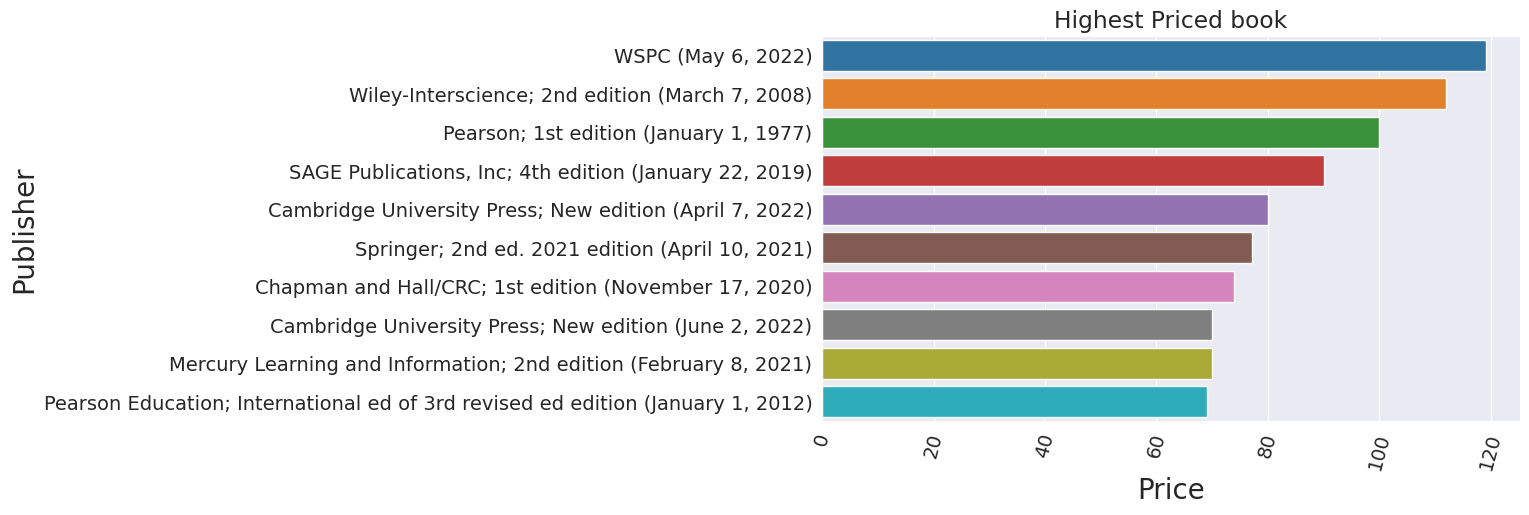

In [ ]:
sns.barplot(y = highest_price['publisher'], x = highest_price['price'])
plt.xticks(rotation = 75);
plt.title("Highest Priced book");
plt.ylabel("Publisher", fontsize=20);
plt.xlabel("Price", fontsize=20);

**Explanation**

With the help of bar graph, we can clearly see that the publisher with costliest book is WSPC (May 6, 2022)


#### Q4: Find out the average number of pages in a data science book and print all the statistics related to it. Plot them in a graph

The average number of pages in a data science book can be easily calculated through mean() function. The answer is approximately 368.

In [ ]:
book_df3.pages.mean()

368.73664122137404

Now we can display the statistics of number of pages in data science books using describe() function.

In [ ]:
book_df3.pages.describe()

count     262.000000
mean      368.736641
std       175.888471
min        56.000000
25%       240.250000
50%       352.000000
75%       456.000000
max      1168.000000
Name: pages, dtype: float64

These results can be plotted using barplot function of seaborn

<Axes: ylabel='pages'>

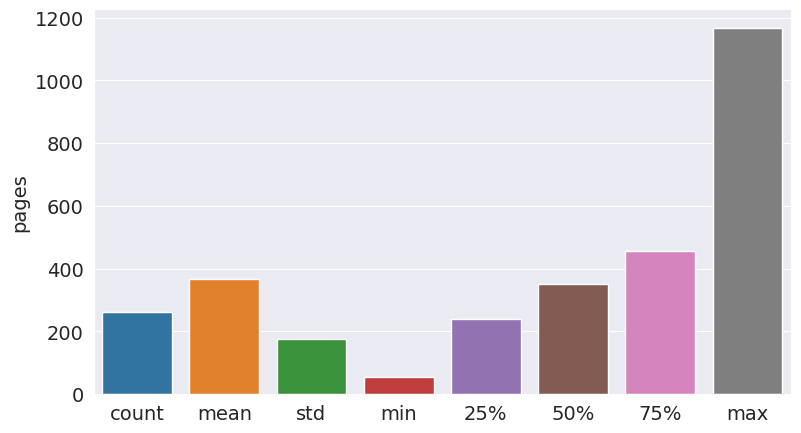

In [ ]:
sns.barplot(x=book_df3.describe()['pages'].index,y=book_df3.describe()['pages'])

**Explanation**

This barplot takes stats of pages column on x-axis and number of pages on y-axis. It shows us all the important stats related to the pages column clearly.

#### Q5: What are the different languages in which the books are written?

Using the unique function we can see that there are only 2 languages in which the books are written

In [ ]:
book_lang=book_df3.language.unique()
book_lang

array(['English', 'Spanish',
       'This Python programming guide assumes certain level of programming knowledge. It is not a beginner textbook.'],
      dtype=object)

Let us create a dataframe containing only English books. Using count function on language column of this dataframe gives us the number of English books

In [ ]:
eng=book_df3[book_df3['language']=='English']
no_eng=eng.language.count()

Let us create a dataframe containing only Spanish books. Using count function on language column of this dataframe gives us the number of Spanish books.

In [ ]:
spa=book_df3[book_df3['language']=='Spanish']
no_spa=spa.language.count()

We can now find out the respective percentages of number of english and spanish books using shape[0] attribute which gives us the total no of rows in dataframe.

In [ ]:
eng_percent=no_eng*100/book_df3.shape[0]
spa_percent=no_spa*100/book_df3.shape[0]

Now create a list containing eng_percent and spa_percent and pass it as a parameter to plt.pie function which creates a pie chart. We have also provided the labels attribute through another list called label. Add a title for the chart using plt.title and a legend using plt.legend().

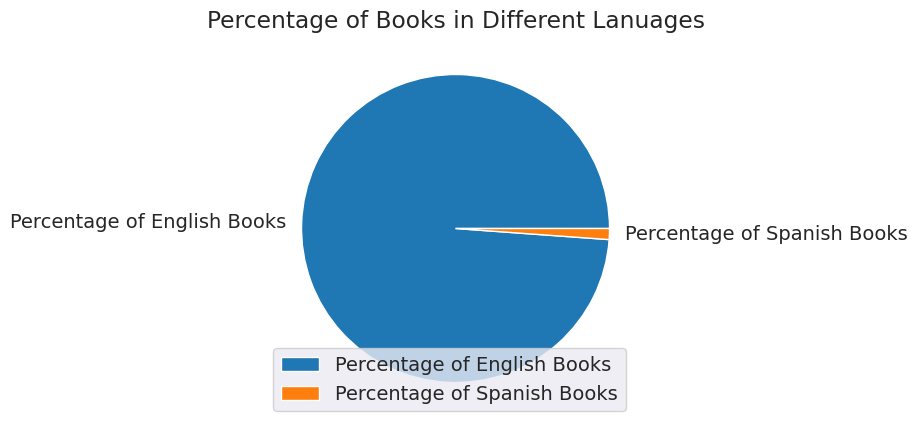

In [ ]:
list_lang=[eng_percent,spa_percent]
label=['Percentage of English Books','Percentage of Spanish Books']
plt.pie(list_lang,labels=label)
plt.title('Percentage of Books in Different Lanuages')
plt.legend();

**Explanation**

  Pie chart is the perfect graph to show the proportions of percentage of books written in english and spanish.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

We've drawn many inferences and conclusions during this project. Here's a summary for a few of them.



*   The books are predominantly written in English language.
*   There is no noticeable correlation between price and the number of pages.
*   The highest price of a book in the dataset is very close to 120
*   The maximum number of pages in a book is very close to 1200.
*   The costliest book in the dataset is Algorithmic Finance: A Companion To Data Science
*   There are 130 books having a rating more than 4.5







In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

You can find the links to the resources that I found useful during the execution of this project and learn more about the tools and libraries used in it.


*   Kaggle Dataset:'https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books'
*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
*   Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
*   opendatasets Python library: https://github.com/JovianML/opendatasets








In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'